<a href="https://colab.research.google.com/github/achmadrachmandika/PCVK/blob/main/PCVK_Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Nama: Achmad Rachmandika Rizky Pratama
#Kelas: 3A
#NIM: 2041720125
##GAMMA

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Buat Gamma Correction sesuai dengan petunjuk berikut
Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai
Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk
meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image
dengan gamma correction sesuai rumus yang telah diberikan.

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


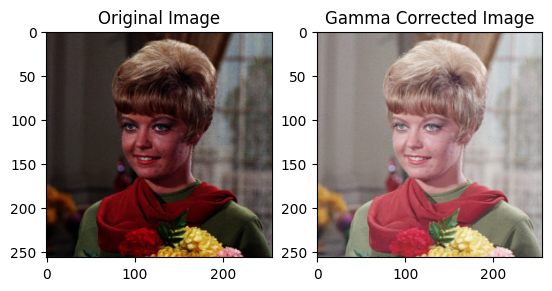

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

print(' Gamma Correction pada citra ')
print('----------------------------------')

def adjust_gamma(image, gamma):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

# Membaca citra
image = cv2.imread('/content/drive/MyDrive/PCVK/Week3/female.tiff')

# Mengatur nilai gamma
gamma = int(input('Masukkan nilai Gamma: '))

# Melakukan gamma correction pada citra
adjusted = adjust_gamma(image, gamma)

# Menampilkan citra asli dan hasil gamma correction
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(adjusted, cv2.COLOR_BGR2RGB))
plt.title("Gamma Corrected Image")

plt.show()

2. Buat Simulasi Image Depth
Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra,
pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada
pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000
0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika
7bit, maka jumlah warnanya adalah 27 = 128, dst.

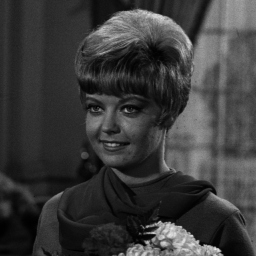

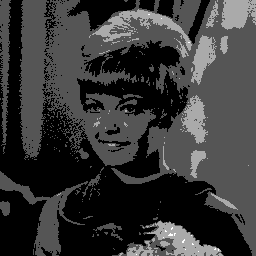

In [22]:
import cv2
import numpy as np

bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)
original = cv2.imread('/content/drive/MyDrive/PCVK/Week3/female.tiff', cv2.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

for i in range(original.shape[0]):
    for j in range(original.shape[1]):
        depth_image[i, j] = int(original[i, j] / level + 0.5) * level

# Menampilkan gambar asli dan hasil kuantisasi citra
cv2_imshow(original)
cv2_imshow(depth_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

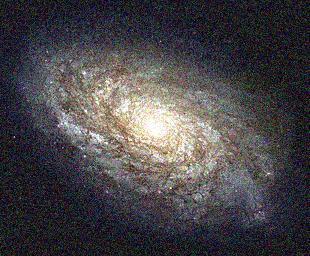

In [49]:
from google.colab.patches import cv2_imshow
import cv2 as cv
import glob

# Load the image
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Week5/noises-20231002T023137Z-001/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

# Apply average denoising to the image
dst = cv.fastNlMeansDenoisingColoredMulti(cv_img, 99, 1)
cv2_imshow(n)

In [50]:
import math

def PSNR(img,amount):
  first_image = img[0]
  for x in range(1,amount):
    if(x==0):
      continue
    first_image = first_image - img[x]
    #print(x)
  mse = np.mean((first_image) ** amount)
  if(mse == 0):
    return 100
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr

print('PSNR')
print('------------------------------')
try:
  averageCitra = int(input('Masukan jumlah citra average: '))
except ValueError:
  print('Error, not a number')
result = PSNR(cv_img,averageCitra)
print('Nilai PSNR: ')
print(result)

PSNR
------------------------------
Masukan jumlah citra average: 5
Nilai PSNR: 
28.355301807982976


In [51]:
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/Week5/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Week5/noises-20231002T023137Z-001/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 4 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

Nilai PSNR adalah 27.54064645580915 (dB)


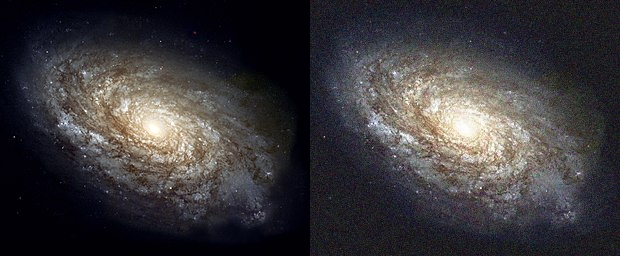

In [52]:
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal.
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.535840935489944 (dB)


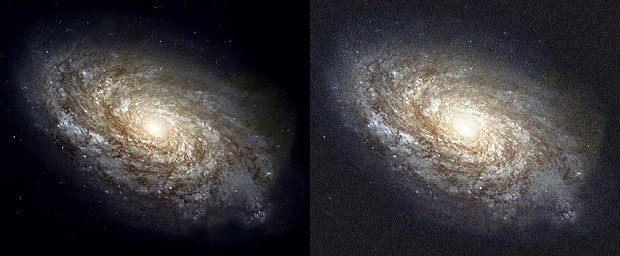

In [56]:
# Memakai jumlah average 5
dst = cv_img[0]
noise_number = 5
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

4. Buat image masking untuk image berikut. Image kiri adalah image asli (image KTP),
sedangkan image paling kanan adalah hasilnya:

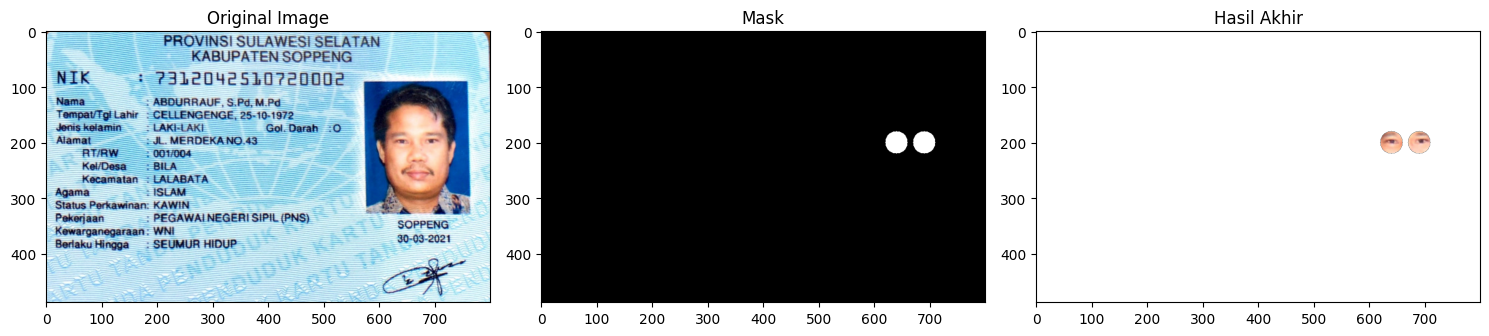

In [1]:

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar asli
image_path = '/content/drive/MyDrive/PCVK/Week3/KTP.jpeg'
original_image = cv.imread(image_path)

# Membuat maska dengan dua lingkaran putih
mask = np.zeros(original_image.shape[:2], dtype="uint8")
cv.circle(mask, (640, 200), 20, 255, -1)
cv.circle(mask, (690, 200), 20, 255, -1)

# Menggunakan operasi bitwise untuk mendapatkan bagian gambar yang ada di dalam maska
masked = cv.bitwise_and(original_image, original_image, mask=mask)

# Mengonversi gambar menjadi grayscale
tmp = cv.cvtColor(masked, cv.COLOR_BGR2GRAY)

# Menggunakan teknik thresholding
_, alpha = cv.threshold(tmp, 0, 255, cv.THRESH_BINARY)

# Memisahkan saluran warna Red, Green, Blue dari gambar asli
b, g, r = cv.split(masked)

# Membuat list yang berisi saluran warna Red, Green, Blue, dan saluran alpha
rgba = [b, g, r, alpha]

# Menggunakan cv.merge() untuk menggabungkan keempat saluran ke dalam gambar RGBA
final = cv.merge(rgba)

# Menampilkan gambar samping-sampingan menggunakan matplotlib
plt.figure(figsize=(15, 5))

# Gambar asli
plt.subplot(131)
plt.imshow(cv.cvtColor(original_image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('on')

# Maska
plt.subplot(132)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.axis('on')

# Hasil akhir dengan latar belakang transparan
plt.subplot(133)
plt.imshow(cv.cvtColor(final, cv.COLOR_BGRA2RGBA))
plt.title('Hasil Akhir')
plt.axis('on')

plt.tight_layout()
plt.show()



5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.
Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

Operator NOT

In [7]:
import cv2 as cv
import numpy as np
# Membaca gambar asli
original = cv.imread('/content/drive/MyDrive/PCVK/Week3/KTP.jpeg')

# Membuat gambar mask dengan dua lingkaran berwarna putih (255, 255, 255)
mask = np.zeros(original.shape, dtype=np.uint8)
mask = cv.circle(mask, (640, 195), 15, (255, 255, 255), -1)
mask = cv.circle(mask, (700, 195), 15, (255, 255, 255), -1)

# Melakukan operasi NOT
masked = ~original & ~mask

# Menggabungkan hasil citra asli, mask dan hasil operasi NOT
final_frame = cv.hconcat((original, mask, masked))
cv2_imshow(final_frame)

NameError: ignored